# Import libs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import yaml
import time
import pprint
import subprocess
import multiprocessing as mp

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer

# create_config Function

In [3]:
def f(l, i):
    l.acquire()
    
    print('parent process:', os.getppid())
    print('process id:', os.getpid())
    
    try:
        print('hello world', i)
        time.sleep(1)
    finally:
        l.release()

if __name__ == '__main__':
    lock = Lock()

    for num in range(10):
        Process(target=f, args=(lock, num)).start()


parent process: 15602
process id: 15648
hello world 0
parent process: 15602
process id: 15651
hello world 1
parent process: 15602
process id: 15652
hello world 2
parent process: 15602
process id: 15653
hello world 3
parent process: 15602
process id: 15660
hello world 4
parent process: 15602
process id: 15667
hello world 5
parent process: 15602
process id: 15674
hello world 6
parent process: 15602
process id: 15679
hello world 7
parent process: 15602
process id: 15680
hello world 8
parent process: 15602
process id: 15681
hello world 9


In [ ]:
def create_config(req, ds, aligned):
    return { 
                'use_neptune': False,
                'script_mode': True,
                'exp_params' : {
                    'name': 'train_vgg16',
                    'description': f'Training network for {req.value.upper()} requisite',
                    'tags': ['vgg16', 'ground truths', 'adamax', ds.value.lower(), 'binary_output', req.value.lower()],
                    'src_files': ['exp_runner.py', 'data_processor.py', 'model_trainer.py', 'model_evaluator.py']
                },
                'properties': {
                    'reqs': [req],
                    'aligned': aligned,
                    'use_gt_data': True,
                    'gt_names': {
                        'train_validation': [],
                        'test': [],
                        'train_validation_test': [ds]
                    },
                    'balance_input_data': False,
                    'train_model': True,
                    'save_trained_model': True,
                    'model_name': '',
                    'sample_training_data': True,
                    'sample_prop': .7
                },
                'net_train_params': {
                    'base_model': BaseModel.VGG16,
                    'batch_size': 64,
                    'n_epochs': 2,
                    'early_stopping': 10,
                    'learning_rate': 1e-3,
                    'optimizer': Optimizer.ADAMAX,
                    'train_prop': 0.9,
                    'validation_prop': 0.05,
                    'test_prop': 0.05,
                    'validation_split': 0.1,
                    'dropout': 0.3
                }
            }

# Execute Experiment Runner

In [5]:
#f_name = 'exp_config.yaml'
#with open(f_name,'w') as f:
#    yaml.dump([exp_cf], f)
#    subprocess.Popen(['python', 'exp_runner.py', '-c', 'exp_config.yaml'])
#!python exp_runner.py -c 'exp_config.yaml' >> 'exp_logs/single_task_exp_logs.log'

In [6]:
from multiprocessing import Process
import os

def info(title):
    print(title)
    print('module name:', __name__)
    print('parent process:', os.getppid())
    print('process id:', os.getpid())

def f(name):
    info('function f')
    print('hello', name)

if __name__ == '__main__':
    info('main line')
    p = Process(target=f, args=('bob',))
    p.start()
    p.join()

main line
module name: __main__
parent process: 5745
process id: 15602
function f
module name: __main__
parent process: 15602
process id: 15682
hello bob


 -- Init ExperimentRunner --
-----
Use Neptune:  False
-----
Args: 
{'exp_params': {'description': 'Training network for MOUTH requisite',
                'name': 'train_vgg16',
                'src_files': ['exp_runner.py',
                              'data_processor.py',
                              'model_trainer.py',
                              'model_evaluator.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'fvc',
                         'binary_output',
                         'mouth']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7fde879909d0>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                      'early_stopping': 10,
                      'learning_rate': 0.001,
                      'n_epochs': 2,
                      'optimizer': <Optimizer.A

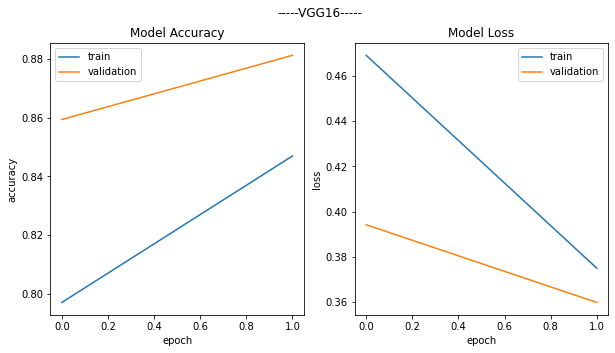

 -- load best model -- 
..Loading best model
..Checkpoint weights loaded
 -- save model -- 
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving process finished
 -- test model -- 
Testing Trained Model
Predicting labels....
5/5 [==============================] - 7s 2s/step
Prediction finished!
Requisite: MOUTH


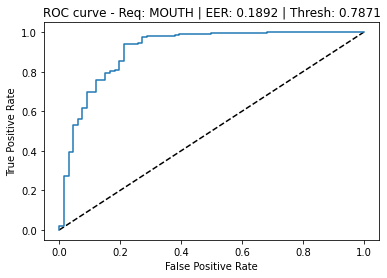

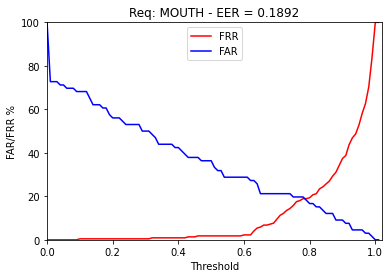

Requisite: ICAO_REQ.MOUTH - EER: 18.92% - Best Threshold: 0.7871
Classification report -----------------------------------
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        66
           1       0.94      0.81      0.87       222

    accuracy                           0.81       288
   macro avg       0.75      0.81      0.77       288
weighted avg       0.85      0.81      0.82       288

Accuracy ------------------------------------------------
Model Accuracy: 81.25%
---------------------------------------------------------
Confusion matrix ----------------------------------------
FAR: 18.18% | FRR: 18.92% | TP: 180 | TN: 54 | FP: 12 | FN: 42
 -- vizualize predictions -- 


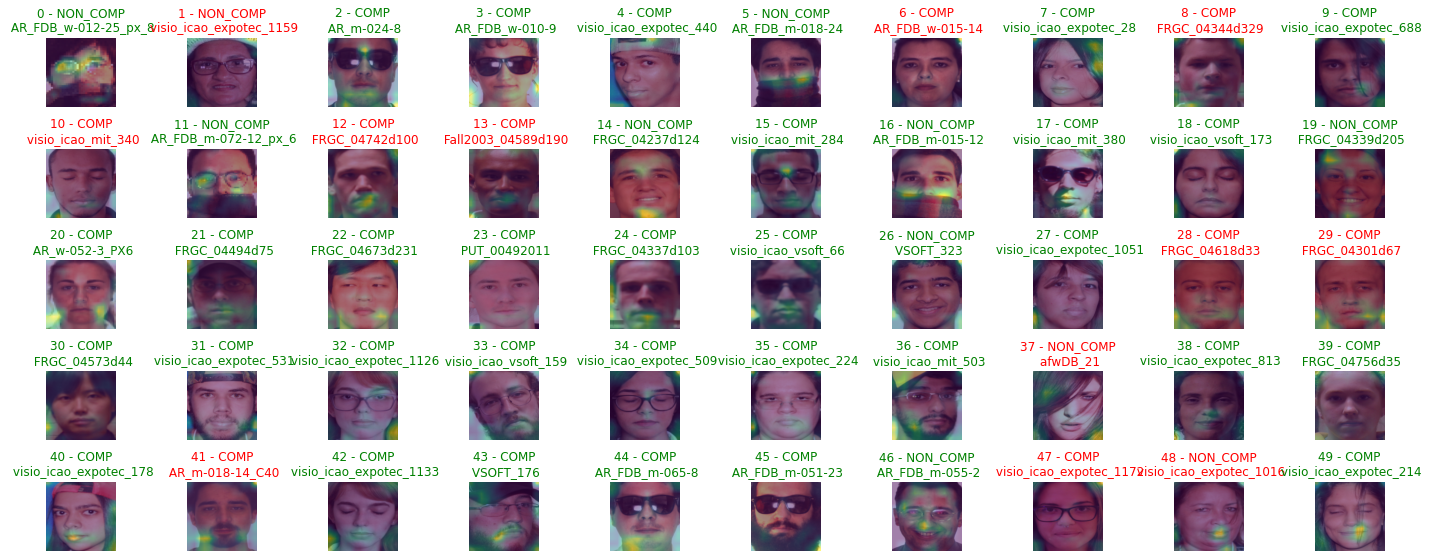

 -- vizualize predictions -- 


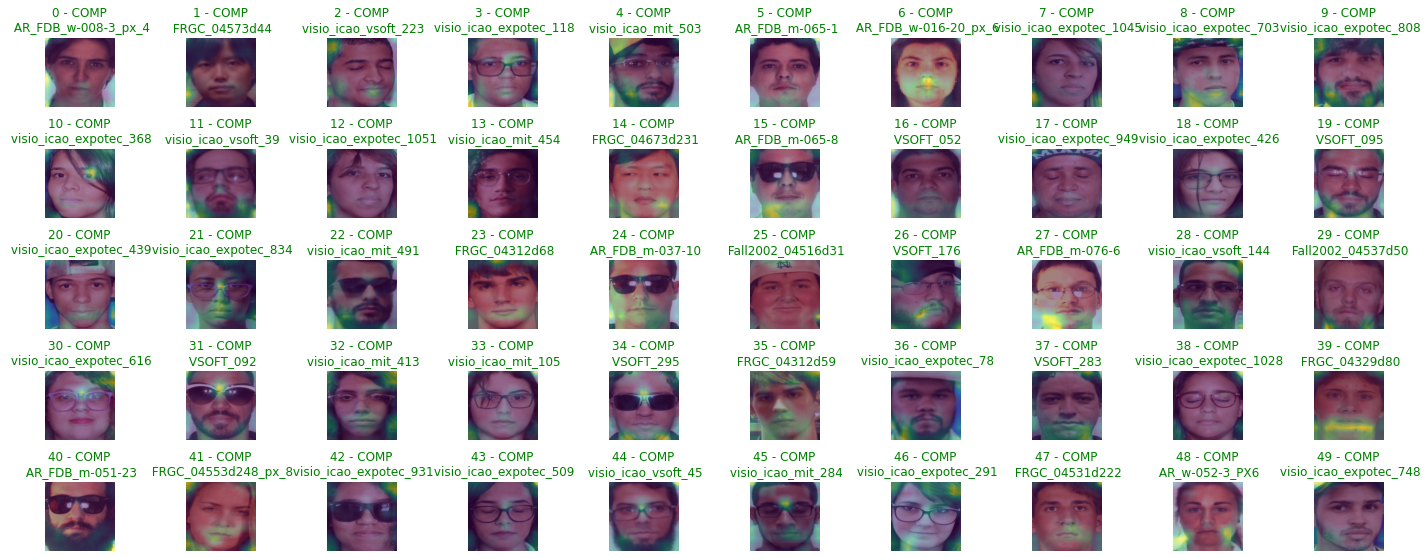

 -- vizualize predictions -- 


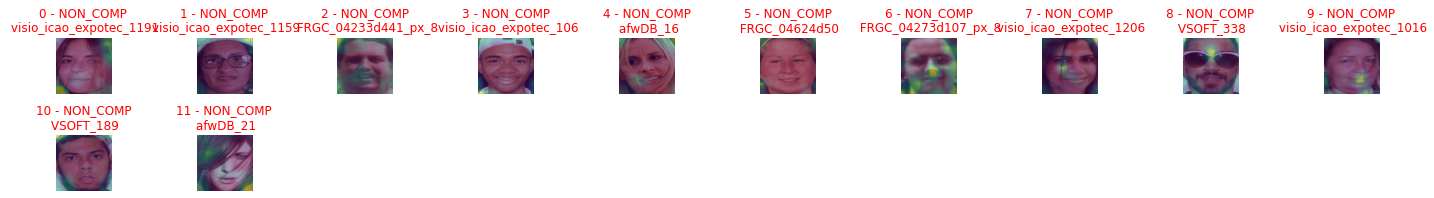

 -- vizualize predictions -- 


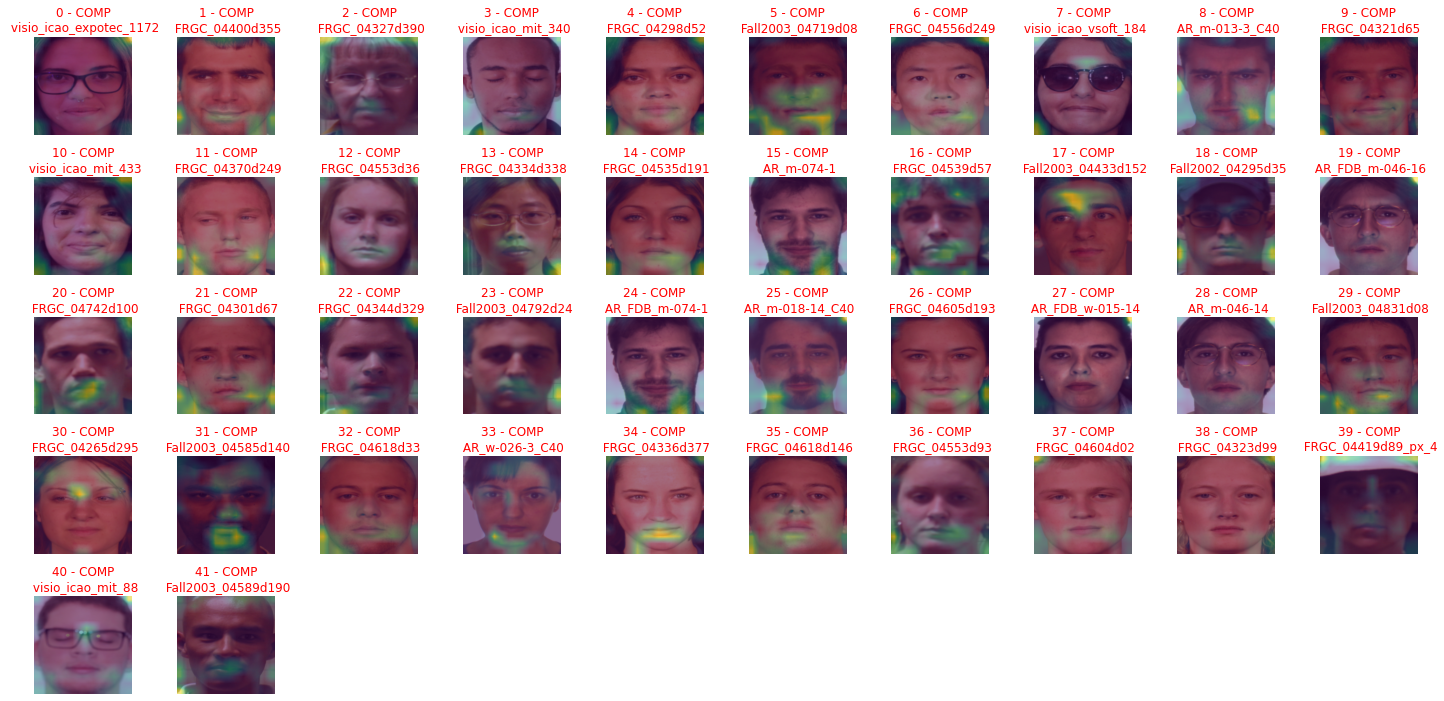

 -- vizualize predictions -- 


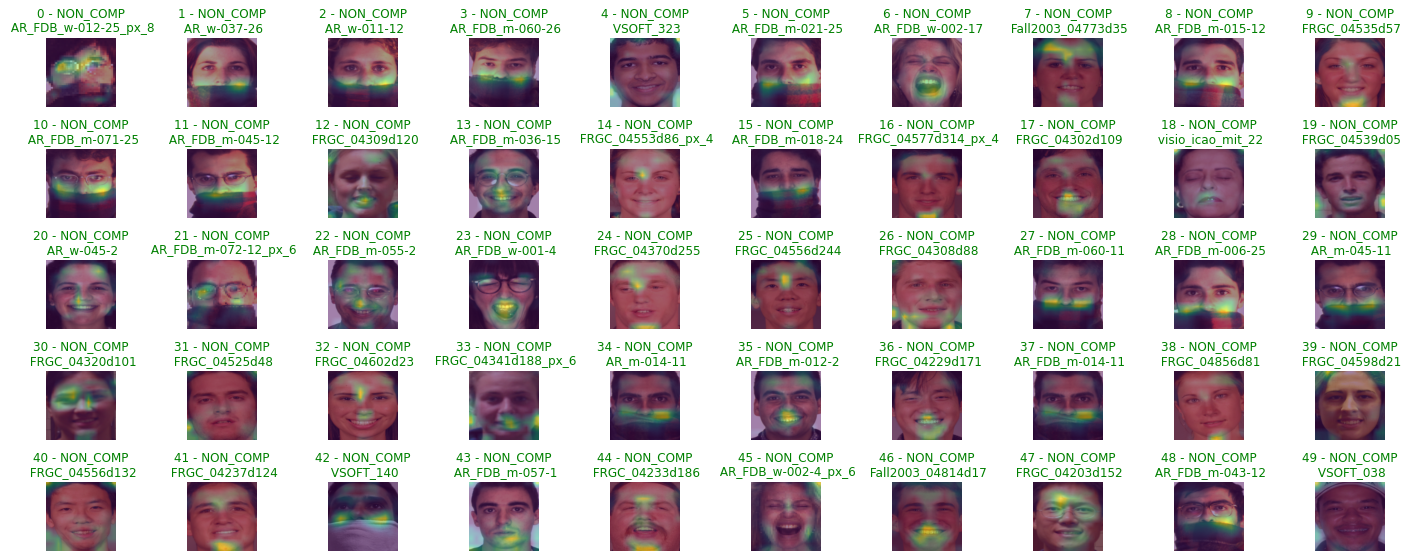

 -- finish experiment --
Not using Neptune
 -- Init ExperimentRunner --
-----
Use Neptune:  False
-----
Args: 
{'exp_params': {'description': 'Training network for MOUTH requisite',
                'name': 'train_vgg16',
                'src_files': ['exp_runner.py',
                              'data_processor.py',
                              'model_trainer.py',
                              'model_evaluator.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'pybossa',
                         'binary_output',
                         'mouth']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7fde879909d0>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                      'early_stopping': 10,
                      'learning_rate': 0.001,
                      'n_epochs': 2,


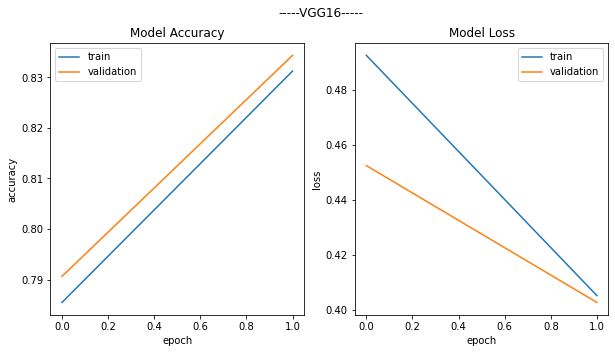

 -- load best model -- 
..Loading best model
..Checkpoint weights loaded
 -- save model -- 
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving process finished
 -- test model -- 
Testing Trained Model
Predicting labels....
5/5 [==============================] - 1s 140ms/step
Prediction finished!
Requisite: MOUTH


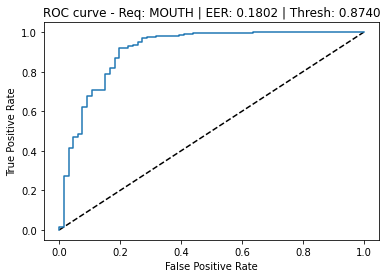

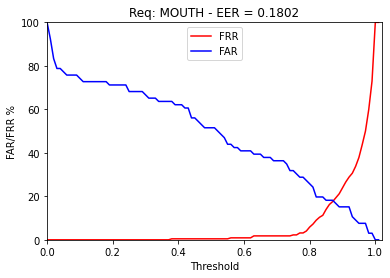

Requisite: ICAO_REQ.MOUTH - EER: 18.02% - Best Threshold: 0.874
Classification report -----------------------------------
              precision    recall  f1-score   support

           0       0.58      0.83      0.68        66
           1       0.94      0.82      0.88       222

    accuracy                           0.82       288
   macro avg       0.76      0.83      0.78       288
weighted avg       0.86      0.82      0.83       288

Accuracy ------------------------------------------------
Model Accuracy: 82.28999999999999%
---------------------------------------------------------
Confusion matrix ----------------------------------------
FAR: 16.669999999999998% | FRR: 18.02% | TP: 182 | TN: 55 | FP: 11 | FN: 40
 -- vizualize predictions -- 


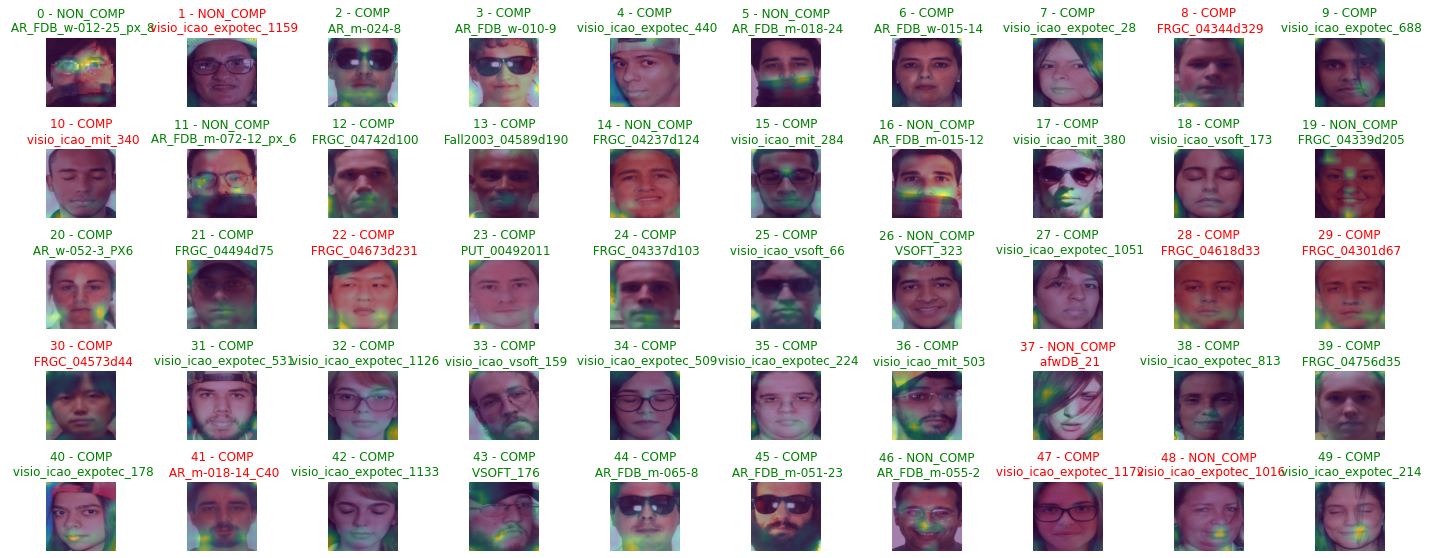

 -- vizualize predictions -- 


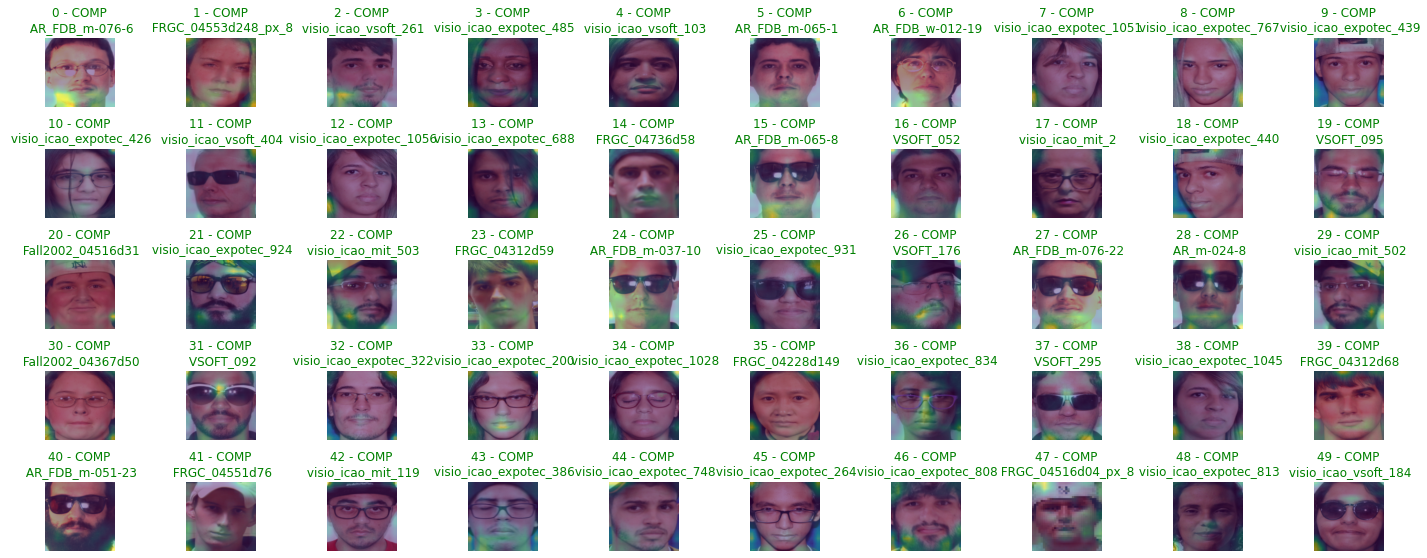

 -- vizualize predictions -- 


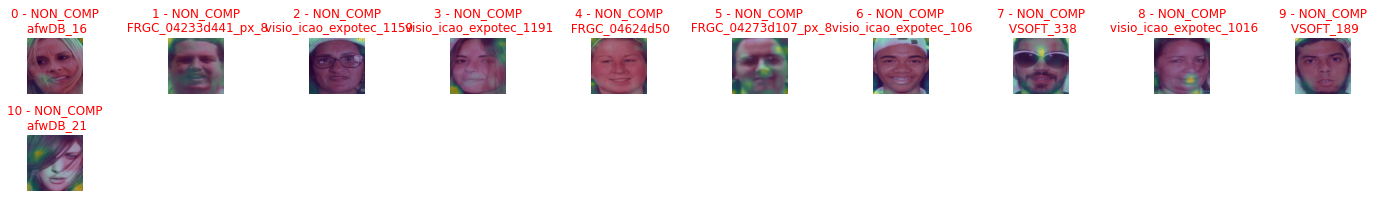

 -- vizualize predictions -- 


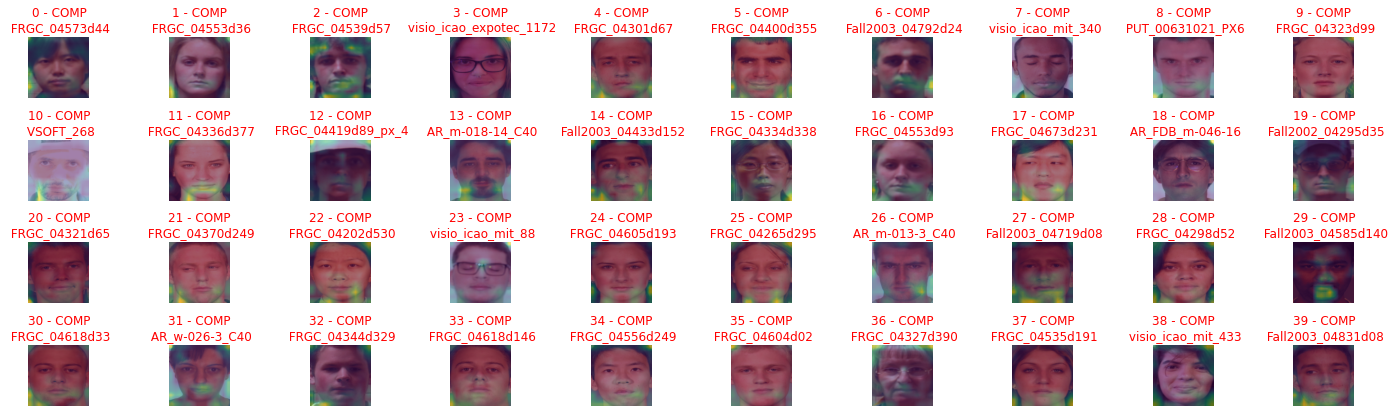

 -- vizualize predictions -- 


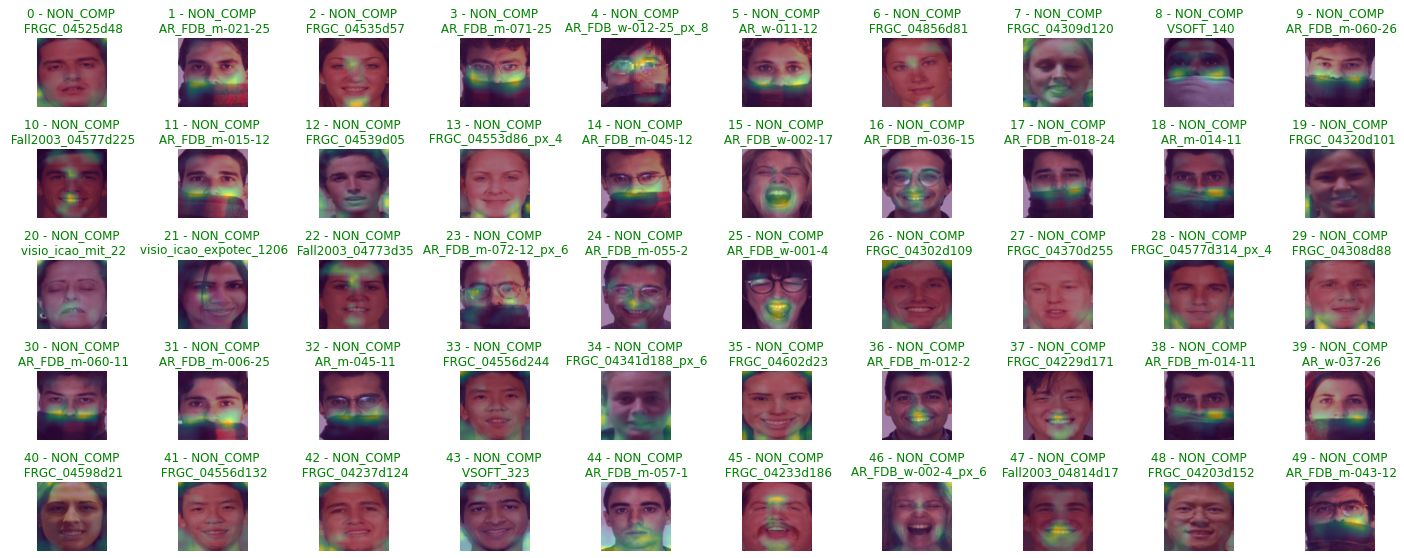

 -- finish experiment --
Not using Neptune


In [11]:
reqs_list = [cts.ICAO_REQ.MOUTH, cts.ICAO_REQ.VEIL] #list(cts.ICAO_REQ)
ds_list = [GTName.FVC, GTName.PYBOSSA]
align_list = [True, False]


def run_experiment(l, cfgs):
    l.acquire()
    
    try:
        print('parent process:', os.getppid())
        print('process id:', os.getpid())
        
        runner = ExperimentRunner(**cfgs)
        runner.run()
    finally:
        l.release()


lock = mp.Lock()
for req in reqs_list:
    for ds in ds_list:
        for alig in align_list:
            exp_cf = create_config(req, ds, alig)
            p = mp.Process(target=run_experiment, args=(lock, exp_cf))
            p.start()
            p.join()
            #runner = ExperimentRunner(**exp_cf)
            #runner.run()

